In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
#database_path = "../Resources/hawaii.sqlite"
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#Query values in Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xcc7d500c10>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
date_latest = session.query(func.max(Measurement.date)).all()
print(date_latest)


[('2017-08-23',)]


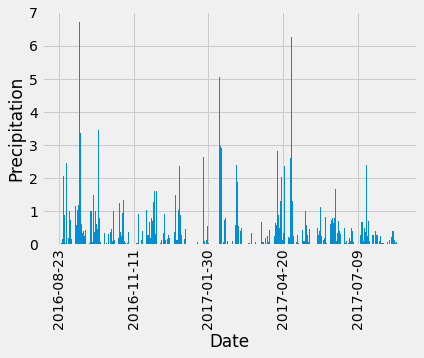

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
#from datetime import timedelta as td
#last 12 months
months_twelve = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precip_twelve = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= months_twelve).all()
#print(precip_twelve)
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_twelve, columns=['Date','Precipitation'])
precip_df = precip_df.set_index('Date').sort_values(['Date'], ascending=True).dropna(how = 'any')

x = precip_df.index.tolist()
y = precip_df['Precipitation']
major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks, rotation ='vertical')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.bar(x,y)
plt.show()

# Use Pandas Plotting with Matplotlib to plot the data




In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
mean = precip_df['Precipitation'].mean()
median = precip_df['Precipitation'].median()
mode = precip_df['Precipitation'].mode()
variance = precip_df['Precipitation'].var()
standard_dev = precip_df['Precipitation'].std()
standard_em = precip_df['Precipitation'].sem()

print(f"The mean precipitation for the last 12 months in Hawaii is {mean}")
print(f"The median precipitation for the last 12 months in Hawaii is {median}")
print(f"The mode precipitation for the last 12 months in Hawaii is {mode}")
print(f"The variance for precipitation in Hawaii for the last 12 months is {variance}")
print(f"The standard deviation for precipitation in Hawaii for the last 12 months is {standard_dev}")
print(f"The standard error mean for precipitation in Hawaii for the last 12 months is {standard_em}")

The mean precipitation for the last 12 months in Hawaii is 0.17727857496288899
The median precipitation for the last 12 months in Hawaii is 0.02
The mode precipitation for the last 12 months in Hawaii is 0    0.0
dtype: float64
The variance for precipitation in Hawaii for the last 12 months is 0.21269575849618527
The standard deviation for precipitation in Hawaii for the last 12 months is 0.46118950388770263
The standard error mean for precipitation in Hawaii for the last 12 months is 0.010258792791451839


In [13]:
precip_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Measurement).group_by(Measurement.station).count()
print(station_total)

9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f" The lowest, highest, and average temperature at the most active station were {active_station} degrees F")

 The lowest, highest, and average temperature at the most active station were [(54.0, 85.0, 71.66378066378067)] degrees F


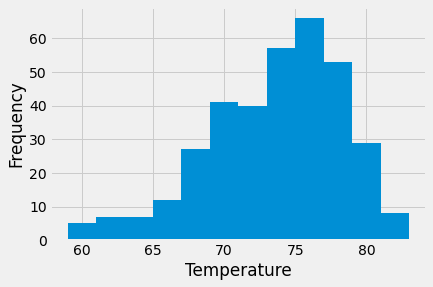

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281', Measurement.date >= months_twelve).all()
temp_twelve = pd.DataFrame(active_temp, columns=['Date','Temperature']).set_index('Date')

plt.hist(temp_twelve, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close session

In [44]:
# Close Session
session.close()